# Considerações:
- Exemplo usando LangChain utilizando Agents
- [LangChain Agents](https://python.langchain.com/v0.1/docs/modules/agents/)
- [LangChain - Build an Agent](https://python.langchain.com/docs/tutorials/agents/)

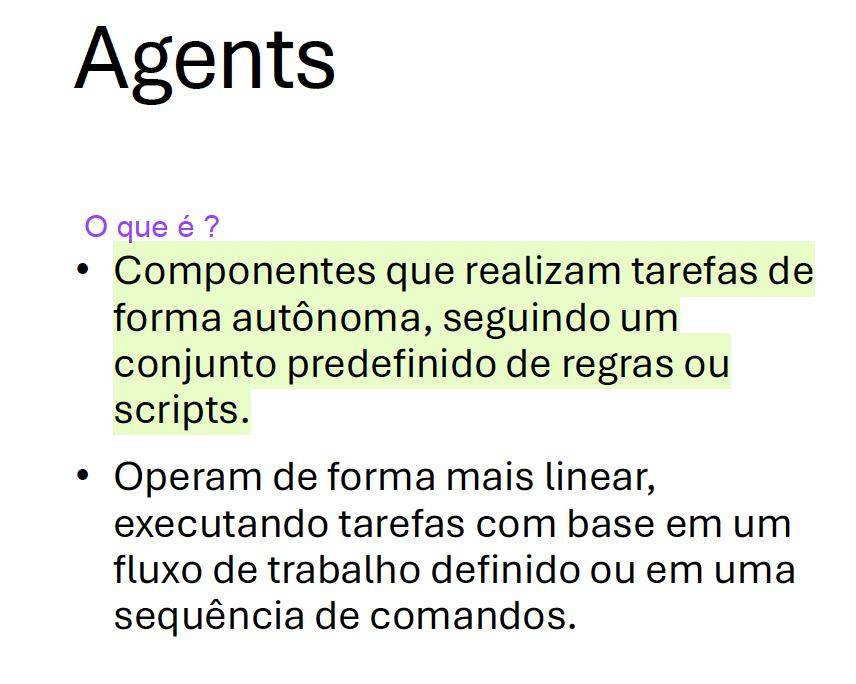

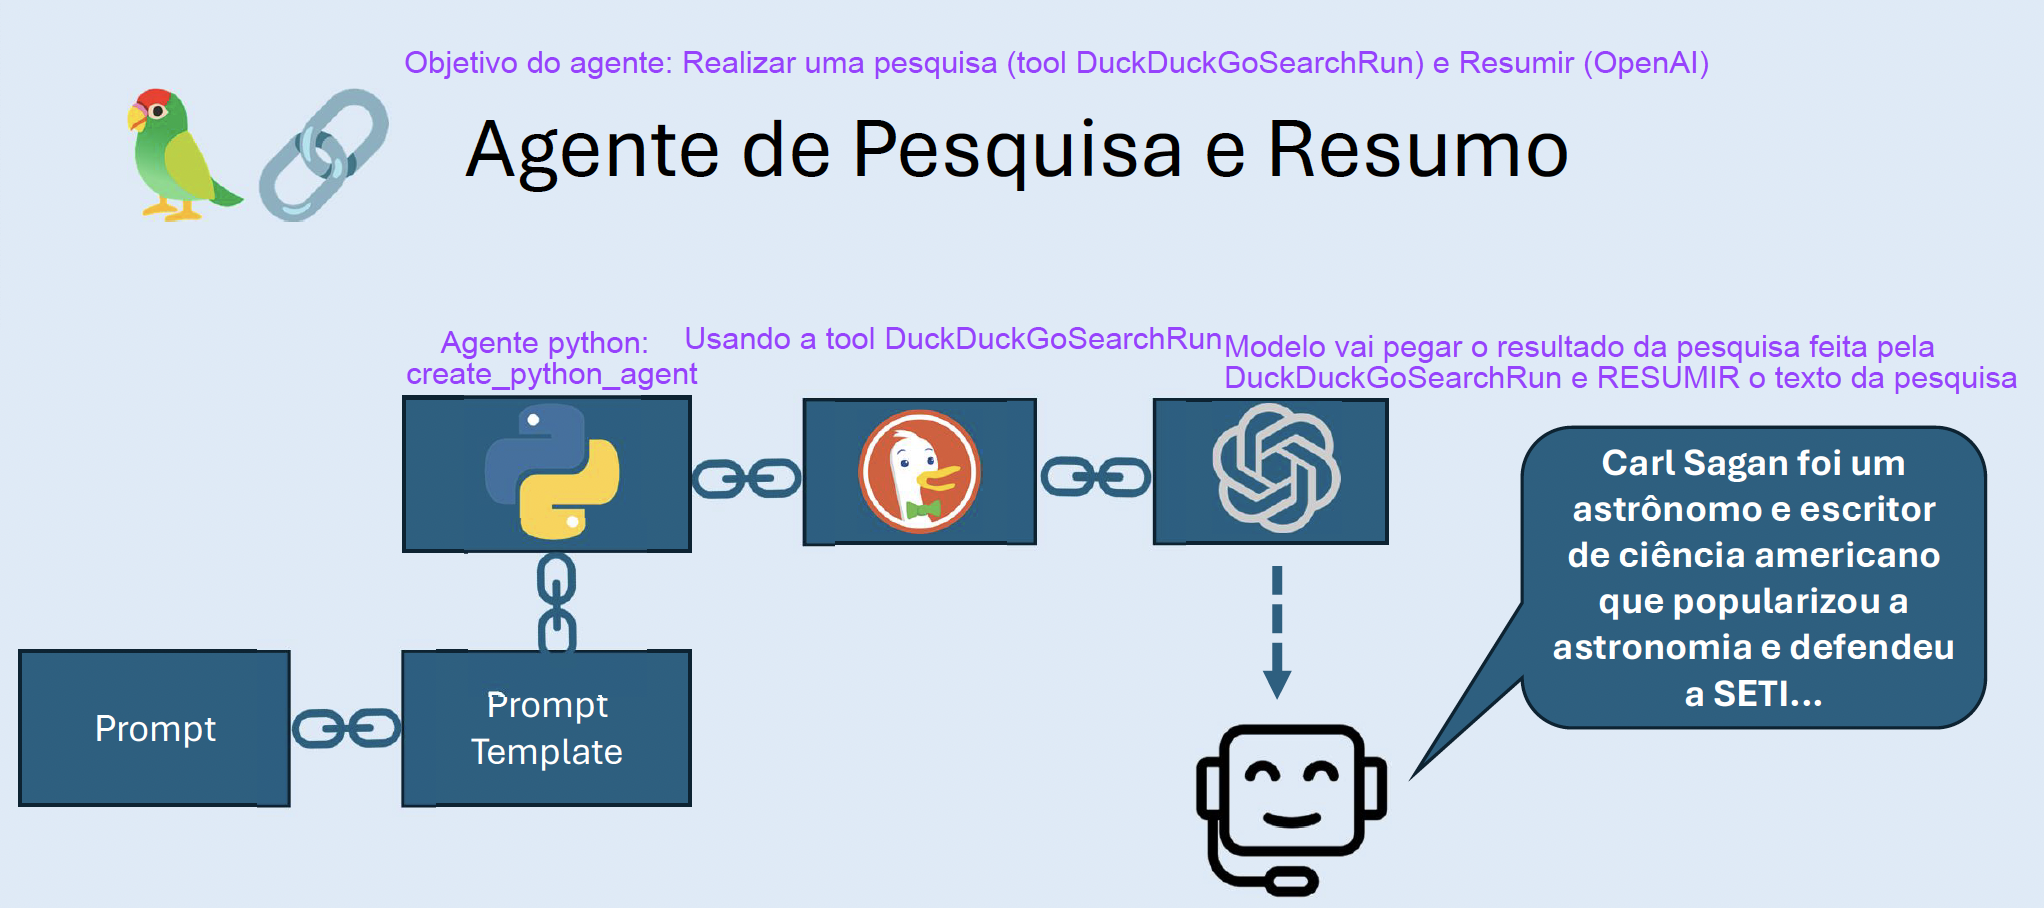

# Setup

In [2]:
# importando as bibliotecas

from langchain_openai import OpenAI
from langchain_experimental.agents.agent_toolkits import create_python_agent # import para criação do agent python
from langchain_community.tools import DuckDuckGoSearchRun
from langchain.prompts import PromptTemplate
import pandas as pd
import yaml
import os

In [4]:
# lendo o arquivo config.yaml para ter acesso a chave de acesso da OpenAI

with open('config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)
os.environ['OPENAI_API_KEY'] = config['OPENAI_API_KEY']

In [5]:
openai = OpenAI(model_name='gpt-3.5-turbo-instruct', temperature=0) # instanciando um objeto OpenAI

# Agente de Busca e Resumo

In [6]:
ddg_search = DuckDuckGoSearchRun() # instanciando um objeto DuckDuckGoSearchRun()

# DuckDuckGoSearchRun: ferramenta de busca sem ser necessário chave de acesso de alguma api, como do google

In [7]:
# Criando o agent python

agent_executor = create_python_agent(
    llm=openai,
    tool=ddg_search,  
    verbose=True
)

In [8]:
# Criando o template de prompt

prompt_template = PromptTemplate(
    input_variables=["query"],
    template="""
    Pesquise na web sobre {query} e forneça um resumo abrangente sobre o assunto.
    """
)

In [9]:
query = "Carl Sagan" # query para busca/simulando a entrada do usuário
prompt = prompt_template.format(query=query) # formatando o prompt final adicionando valor a variável {query}

In [10]:
print(prompt) # imprimindo prompt


    Pesquise na web sobre Carl Sagan e forneça um resumo abrangente sobre o assunto.
    


In [21]:
# Executando o agente
# Será feito os passos:
    # pesquisa o termo na web com DuckDuckGoSearchRun
    # chama o modelo de llm para resumir o texto de saída
response = agent_executor.invoke(prompt) 



> Entering new AgentExecutor chain...
 Eu devo usar a função duckduckgo_search para pesquisar na web.
Action: duckduckgo_search
Action Input: Carl Sagan
Observation: Carl Sagan (born November 9, 1934, Brooklyn, New York, U.S.—died December 20, 1996, Seattle, Washington) was an American astronomer and science writer. A popular and influential figure in the United States, he was controversial in scientific, political, and religious circles for his views on extraterrestrial intelligence, nuclear weapons, and ... Much beloved astronomer and science communicator Carl Sagan once recorded a message, for future astronauts setting foot on the planet Mars. Sagan was a big advocate for exploration of the Red Planet. Carl Sagan's scientific work also explored the possibility of contact with extraterrestrial life. The Voyager spacecraft, launched in 1977, carried a more elaborate message about humanity than the Pioneer plaques. Attached to Voyager was a gold-plated copper record—a kind of "time c

In [22]:
print("Entrada do agente:", response['input']) # imprimindo a entrada do agente

Entrada do agente: 
    Pesquise na web sobre Carl Sagan e forneça um resumo abrangente sobre o assunto.
    


In [23]:
print("Saída do agente:", response['output'])  # imprimindo a saída do agente

Saída do agente: Carl Sagan foi um astrônomo e escritor científico americano, nascido em 9 de novembro de 1934 em Brooklyn, Nova York, e falecido em 20 de dezembro de 1996 em Seattle, Washington. Ele foi uma figura popular e influente nos Estados Unidos, mas também controverso em círculos científicos, políticos e religiosos por suas opiniões sobre inteligência extraterrestre, armas nucleares e exploração espacial. Sagan também foi um grande defensor da exploração de Marte e da possibilidade de contato com vida extraterrestre. Seu trabalho científico incluiu a criação de mensagens para serem enviadas em espaçonaves, como a Voyager, que carregava um disco de ouro com informações sobre a vida na Terra. Além disso, Sagan foi um grande divulgador científico, popularizando a ciência através de seu programa de TV "Cosmos".


In [24]:
print("Resposta do agente:", response) # imprimindo toda a resposta

Resposta do agente: {'input': '\n    Pesquise na web sobre Carl Sagan e forneça um resumo abrangente sobre o assunto.\n    ', 'output': 'Carl Sagan foi um astrônomo e escritor científico americano, nascido em 9 de novembro de 1934 em Brooklyn, Nova York, e falecido em 20 de dezembro de 1996 em Seattle, Washington. Ele foi uma figura popular e influente nos Estados Unidos, mas também controverso em círculos científicos, políticos e religiosos por suas opiniões sobre inteligência extraterrestre, armas nucleares e exploração espacial. Sagan também foi um grande defensor da exploração de Marte e da possibilidade de contato com vida extraterrestre. Seu trabalho científico incluiu a criação de mensagens para serem enviadas em espaçonaves, como a Voyager, que carregava um disco de ouro com informações sobre a vida na Terra. Além disso, Sagan foi um grande divulgador científico, popularizando a ciência através de seu programa de TV "Cosmos".'}
